# Data Visualization FACENS 

### Integrantes:

* Adriano, Allan, João, Rafael, Vinícius

### DATASET:  Cars


# Bibliotecas

In [59]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go #visualization
import plotly.express as px #visualization
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline 
sns.set(color_codes=True)
from scipy.stats import linregress
from scipy import stats



def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

In [60]:
cars = pd.read_csv("./cars.csv")

In [61]:
df = pd.DataFrame(cars)
df.head()

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
0,18,Automatic transmission,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,Gasoline,140,25,250,False,2009 Audi A3 3.2,143,Audi,2009 Audi A3,6,236,6 Speed Automatic Select Shift,202,2009
1,22,Automatic transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T AT,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
2,21,Manual transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,30,200,False,2009 Audi A3 2.0 T,143,Audi,2009 Audi A3,6,207,6 Speed Manual,202,2009
3,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
4,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009


# Informações do dataset

In [62]:
df.shape

(5076, 18)

In [63]:
df.describe()

,City mpg,Height,Highway mpg,Horsepower,Length,Number of Forward Gears,Torque,Width,Year
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,17.275808,145.632191,24.125493,270.499409,127.825847,5.519110,272.707250,144.012411,2010.867612
std,4.479485,62.125026,6.488293,95.293537,77.358295,0.845637,100.123328,79.925899,0.782951
min,8.000000,1.000000,11.000000,100.000000,2.000000,4.000000,98.000000,1.000000,2009.000000
25%,14.000000,104.000000,20.000000,190.000000,60.000000,5.000000,187.000000,62.000000,2010.000000
50%,17.000000,152.000000,24.000000,266.000000,128.000000,6.000000,260.000000,158.000000,2011.000000
75%,20.000000,193.000000,28.000000,317.000000,198.000000,6.000000,335.000000,219.000000,2011.000000
max,38.000000,255.000000,223.000000,638.000000,255.000000,8.000000,774.000000,254.000000,2012.000000


### Removendo duplicados

In [64]:
df = df.drop_duplicates(subset='ID', keep='first')
df.count()

City mpg                   5030
Classification             5030
Driveline                  5030
Engine Type                5030
Fuel Type                  5030
Height                     5030
Highway mpg                5030
Horsepower                 5030
Hybrid                     5030
ID                         5030
Length                     5030
Make                       5030
Model Year                 5030
Number of Forward Gears    5030
Torque                     5030
Transmission               5030
Width                      5030
Year                       5030
dtype: int64

### Verificando valores nulos

In [65]:
print(df.isnull().sum())

City mpg                   0
Classification             0
Driveline                  0
Engine Type                0
Fuel Type                  0
Height                     0
Highway mpg                0
Horsepower                 0
Hybrid                     0
ID                         0
Length                     0
Make                       0
Model Year                 0
Number of Forward Gears    0
Torque                     0
Transmission               0
Width                      0
Year                       0
dtype: int64


# Outliers observados

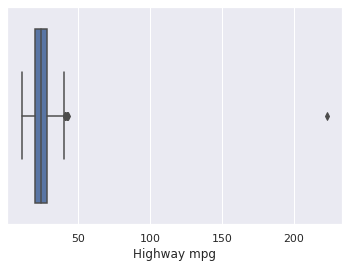

In [66]:
sns.boxplot(x=df['Highway mpg'])

In [67]:
fig = go.Figure()
fig.add_trace(go.Box(y=df.Height, name="Height"))
fig.add_trace(go.Box(y=df.Horsepower, name="Horsepower"))
fig.add_trace(go.Box(y=df.Length, name="Length"))
fig.add_trace(go.Box(y=df.Torque, name="Torque"))
fig.add_trace(go.Box(y=df.Width, name="Width"))
fig.show()

In [49]:
fig = go.Figure()
fig.add_trace(go.Box(y=df.Year, name="Year"))
fig.show()

In [46]:
fig = go.Figure()
fig.add_trace(go.Box(y=df["City mpg"], name="City mpg"))
fig.add_trace(go.Box(y=df["Highway mpg"], name="Highway mpg"))
fig.show()

### Tratando outliers

In [47]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

# Sera criado o df_ok com os outliers ajustados
df_ok = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_ok.shape

(4729, 18)

In [48]:
df.describe()

,City mpg,Height,Highway mpg,Horsepower,Length,Number of Forward Gears,Torque,Width,Year
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,17.290855,145.714513,24.148509,270.305169,127.558847,5.518290,272.314911,143.760040,2010.868986
std,4.483626,62.208912,6.498391,95.307542,77.250878,0.845351,99.943214,79.990939,0.784197
min,8.000000,1.000000,11.000000,100.000000,2.000000,4.000000,98.000000,1.000000,2009.000000
25%,14.000000,104.000000,20.000000,189.250000,60.000000,5.000000,186.000000,62.000000,2010.000000
50%,17.000000,152.000000,24.000000,266.000000,128.000000,6.000000,260.000000,157.000000,2011.000000
75%,20.000000,193.000000,28.000000,317.000000,198.000000,6.000000,335.000000,219.000000,2011.000000
max,38.000000,255.000000,223.000000,638.000000,255.000000,8.000000,774.000000,254.000000,2012.000000


# Outliers tratados

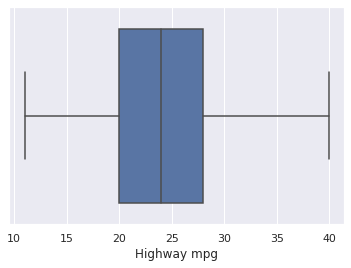

In [20]:
sns.boxplot(x=df_ok['Highway mpg'])

In [21]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_ok.Height, name="Height"))
fig.add_trace(go.Box(y=df_ok.Horsepower, name="Horsepower"))
fig.add_trace(go.Box(y=df_ok.Length, name="Length"))
fig.add_trace(go.Box(y=df_ok.Torque, name="Torque"))
fig.add_trace(go.Box(y=df_ok.Width, name="Width"))
fig.show()

In [22]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_ok.Year, name="Year"))
fig.show()

In [23]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_ok["City mpg"], name="City mpg"))
fig.add_trace(go.Box(y=df_ok["Highway mpg"], name="Highway mpg"))
fig.show()

# Overview de Veiculos - Barras

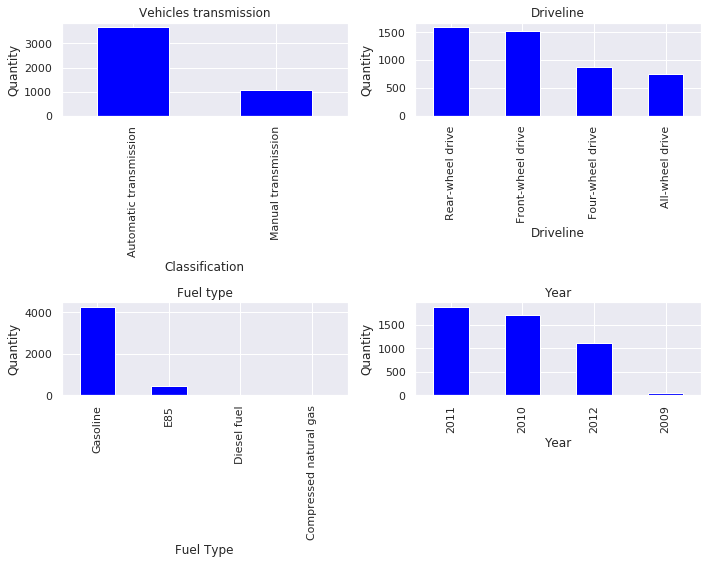

In [24]:
plt.figure(1)
plt.subplot(221)
df_ok['Classification'].value_counts(normalize=False).plot(figsize=(10,8),kind='bar',color='blue')
plt.title("Vehicles transmission")
plt.ylabel('Quantity')
plt.xlabel('Classification');

plt.figure(1)
plt.subplot(222)
df_ok['Driveline'].value_counts(normalize=False).plot(figsize=(10,8),kind='bar',color='blue')
plt.title("Driveline")
plt.ylabel('Quantity')
plt.xlabel('Driveline');

plt.figure(1)
plt.subplot(223)
df_ok['Fuel Type'].value_counts(normalize=False).plot(figsize=(10,8),kind='bar',color='blue')
plt.title("Fuel type")
plt.ylabel('Quantity')
plt.xlabel('Fuel Type');


plt.figure(1)
plt.subplot(224)
df_ok['Year'].value_counts(normalize=False).plot(figsize=(10,8),kind='bar',color='blue')
plt.title("Year")
plt.ylabel('Quantity')
plt.xlabel('Year');


plt.tight_layout()
plt.show()


# Distribuição de Veículos - Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9d62ba550>,
      dtype=object)

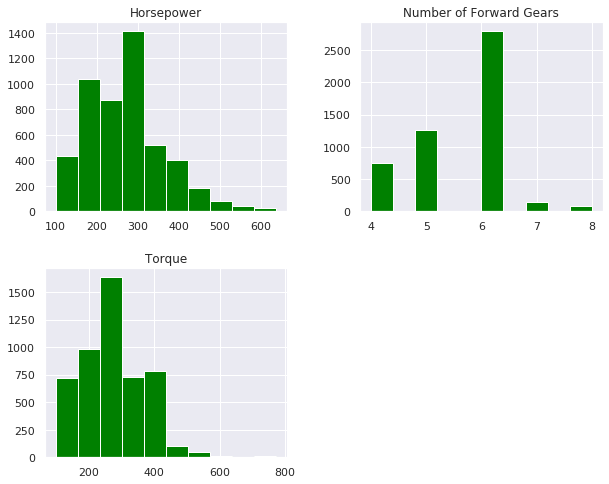

In [25]:
df[['Horsepower','Torque','Number of Forward Gears']].hist(figsize=(10,8),bins=10,color='Green')

In [50]:
fig = px.scatter(data_frame=df_ok, x="Horsepower", y="Torque", labels={"Horsepower": "Cavalos"})
fig.show()

* Há uma forte correlação entre Cavalo e Torque até cerca de 200 cavalos

In [28]:
fig = px.scatter(data_frame=df_ok, y="Length", x="Height", labels={"Length": "Largura", "Height": "Altura"})
fig.show()

* Não há correlação entre Largura e altura

In [29]:
fig = px.scatter(data_frame=df_ok, y="Width", x="Height", labels={"Width": "Comprimento", "Height": "Altura"})
fig.show()

* Não há correlação entre Comprimento e Altura

In [30]:
fig = px.scatter(data_frame=df_ok, y="Length", x="Width", labels={"Length": "Largura", "Width": "Comprimento"})
fig.show()

* Não há correlação entre Largura e Comprimento

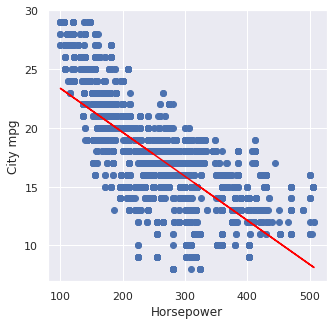

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Horsepower')
ax.set_ylabel('City mpg')
x = df_ok['Horsepower']
y = df_ok['City mpg']
stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")
plt.show()

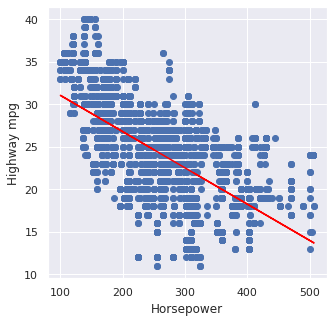

In [32]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Horsepower')
ax.set_ylabel('Highway mpg')
x = df_ok['Horsepower']
y = df_ok['Highway mpg']
stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")
plt.show()

Text(0.5, 1.08, 'Consumption per type of gás')

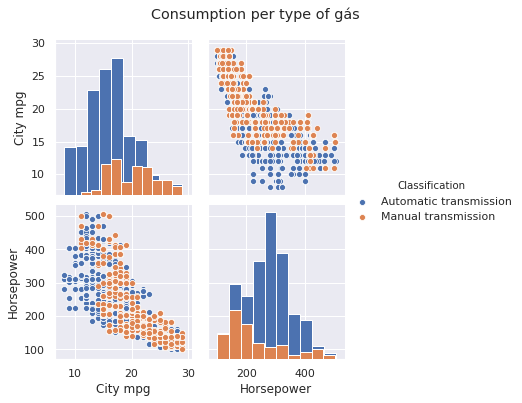

In [33]:
g = sns.pairplot(df_ok[["City mpg", "Horsepower", "Engine Type", "Classification","Fuel Type"]], hue="Classification", diag_kind="hist")
g.fig.suptitle("Consumption per type of gás", y=1.08)

# Correlações

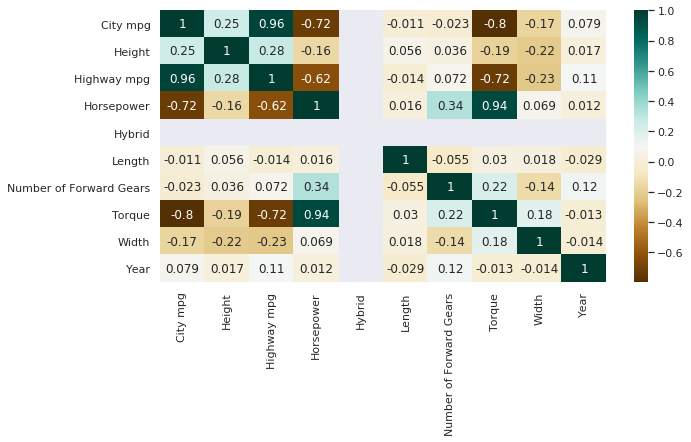

In [51]:
plt.figure(figsize=(10,5))
c= df_ok.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

## Referencias


https://towardsdatascience.com/exploring-the-data-using-python-47c4bc7b8fa2

https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

https://www.kaggle.com/shubhamsinghgharsele/exploratory-data-analysis-on-automobile-dataset

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba